In [45]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
print("Keys of dataset:", iris.keys())
print("Target names:", iris.target_names)
print("Feature names:", iris.feature_names)
print("Shape of data:", iris.data.shape)
print("First 5 rows of data:\n", iris.data[:5])
print("First 5 target values:", iris.target[:5])


Keys of dataset: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Target names: ['setosa' 'versicolor' 'virginica']
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Shape of data: (150, 4)
First 5 rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
First 5 target values: [0 0 0 0 0]


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
print(df.shape)
print(df.head())
print(df['species'].value_counts())

(150, 6)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


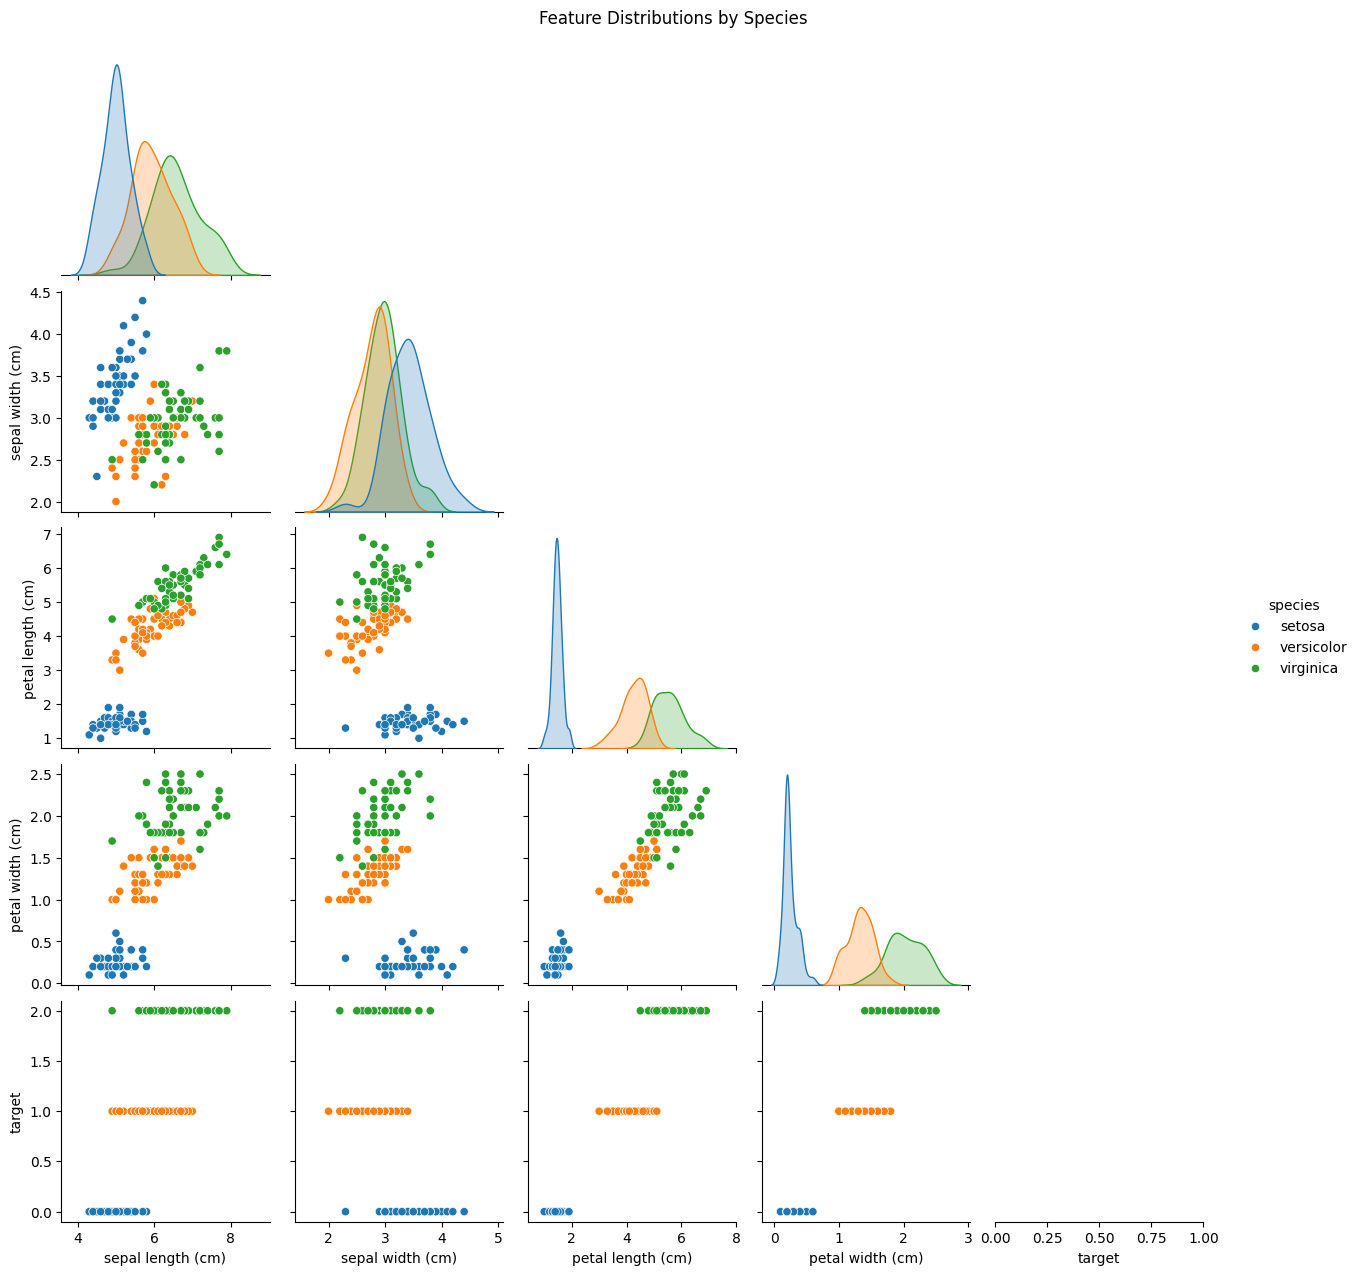

In [6]:
# Pairplot to see relationships
sns.pairplot(df, hue='species', corner = True)
plt.suptitle("Feature Distributions by Species", y=1.02)
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
x= iris.data
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y,
test_size= 0.2, random_state = 42, stratify = y)
print("Training shape:", x_train.shape)
print("Test shape:", x_test.shape)

Training shape: (120, 4)
Test shape: (30, 4)


In [10]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training data, transform both train and test
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [12]:
import numpy as np
print("Before Scaling:", np.round(x_train[:1], 2))
print("After Scaling:", np.round(x_train_scaled[:1], 2))


Before Scaling: [[4.4 2.9 1.4 0.2]]
After Scaling: [[-1.72 -0.33 -1.35 -1.32]]


In [14]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model with k=3 (arbitrary start)
knn = KNeighborsClassifier(n_neighbors=3)

# Train (fit) the model on scaled training data
knn.fit(x_train_scaled, y_train)


,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [28]:
print("Actual:", y_test[0])
print("Predicted:", knn.predict([x_test_scaled[0]]))
print("setosa" if knn.predict([x_test_scaled[0]])[0] == 0 else "versicolor" if knn.predict([x_test_scaled[0]])[0] == 1 else "virginica")

Actual: 0
Predicted: [0]
setosa


In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on test data
y_pred = knn.predict(x_test_scaled)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Precision, Recall, F1-Score
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))


Accuracy: 0.9333333333333333
Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



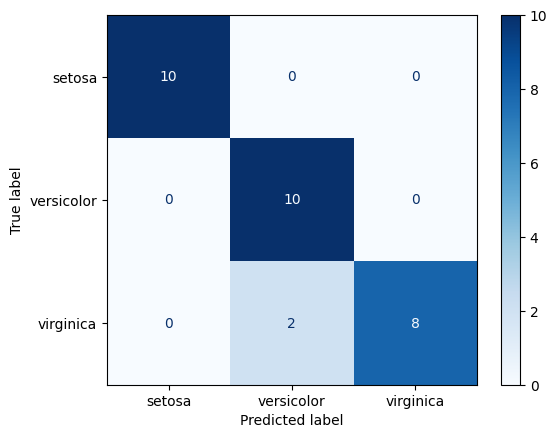

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# True labels and predictions
y_pred = knn.predict(x_test_scaled)
cm = confusion_matrix(y_test, y_pred)

# Display with class labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["setosa", "versicolor", "virginica"])
disp.plot(cmap="Blues", values_format='d')  # 'd' for integer values


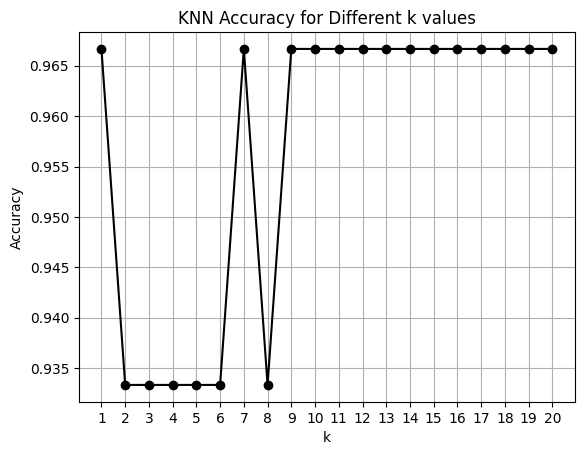

In [42]:
#tuning with various k in range
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

k_range = range(1, 21)
accuracies = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_scaled, y_train)
    y_pred_k = knn.predict(x_test_scaled)
    acc = accuracy_score(y_test, y_pred_k)
    accuracies.append(acc)

# Plot
plt.plot(k_range, accuracies, marker='o', linestyle='-', color='black')
plt.title('KNN Accuracy for Different k values')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()
